In [1]:
from dolfin import *
from mshr import *

In [2]:
# Create mesh
rectangle = Rectangle(Point(-1., -1.), Point(1., 1.))
circle1 = Circle(Point(0., 0.), 0.25, segments=16)
circle2 = Circle(Point(0., 0.), 0.5, segments=32)
circle3 = Circle(Point(0., 0.), 0.75, segments=32)
domain = rectangle
domain.set_subdomain(1, circle1)
domain.set_subdomain(2, circle2 - circle1)
domain.set_subdomain(3, circle3 - circle2)
domain.set_subdomain(4, rectangle - circle3)
mesh = generate_mesh(domain, 12)

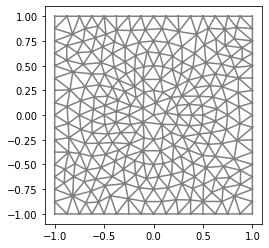

In [3]:
plot(mesh)

In [4]:
# Create subdomains
subdomains = MeshFunction("size_t", mesh, 2, mesh.domains())

In [5]:
# Create boundaries
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] + 1.) < DOLFIN_EPS


class Right(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 1.) < DOLFIN_EPS


class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] + 1.) < DOLFIN_EPS


class Top(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] - 1.) < DOLFIN_EPS


boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
bottom = Bottom()
bottom.mark(boundaries, 1)
left = Left()
left.mark(boundaries, 2)
right = Right()
right.mark(boundaries, 2)
top = Top()
top.mark(boundaries, 3)

In [6]:
# Save
File("unit_square.xml") << mesh
File("unit_square_physical_region.xml") << subdomains
File("unit_square_facet_region.xml") << boundaries
# XDMFFile("unit_square.xdmf").write(mesh)
# XDMFFile("unit_square_physical_region.xdmf").write(subdomains)
# XDMFFile("unit_square_facet_region.xdmf").write(boundaries)